In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
class OrClassifier:
    """
    A classifier class for predicting OR gate performing two-variated binary classification and using logistic regression.
    """
    # Constructor
    def __init__(self, X, y, alpha = 0.01):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.m, self.n = self.X.shape
        self.theta = np.random.rand(self.n)

    
    # Plotting the training set
    def plot_training_set(self):
        plt.title("Training Set")
        plt.grid()
        for i in range(self.m):
            if self.y[i] == 0:
                plt.plot(self.X[i, 1], self.X[i, 2], "rx")
            else:
                plt.plot(self.X[i, 1], self.X[i, 2], "go")

    
    # Computing sigmoid value of parameter z
    def sigmoid_function(self, z):
        sigmoid_value = 1 / (1 + np.exp(-z))
        return sigmoid_value

    
    # Computing hypothesis function based on sigmoid value
    def hypothesis_function(self, x):
        z = x.dot(self.theta)
        hypo_vals = self.sigmoid_function(z)
        return hypo_vals

    
    # Computing cost/loss function for logistic regression
    def cost_function(self):
        summation = 0
        for i in range(self.m):
            part1 = self.y[i] * np.log(self.hypothesis_function(X[i, :]))
            part2 = (1 - self.y[i]) * np.log(1 - self.hypothesis_function(X[i, :]))
            summation += part1 + part2
        cost_val = (-1 / self.m) * summation

        # part1 = self.y * np.log(self.hypothesis_function(X))
        # part2 = (1 - self.y) * np.log(1 - self.hypothesis_function(X))
        # summation = sum(part1 + part2)
        # cost_vals = (-1 / self.m) * summation
        
        return cost_val

    
    # Computing gradient of cost function for using in gradient descent process
    def gradient(self):
        y_pred = self.hypothesis_function(X)
        y_true = self.y
        error = y_pred - y_true
        summation = self.X.T @ error
        gradient_vals = (1 / self.m) * summation
        return gradient_vals


    # Gradient descent process to obtain optimized theta values,
    # cost history values and the number of iterations needed for reaching a convergence
    def gradient_descent(self):
        """
        Gradient descent process to obtain optimized theta values, cost history values and the number of iterations needed for reaching a convergence.
        !!! Be aware not to use this method and plot_cost_iteration method at the same time as it will cause incorrect results. !!!
        """
        flag = 10
        iteration = 0
        cost_history = list()
        
        while flag > 0.000001:
            old_cost = self.cost_function()
            cost_history.append(old_cost)
            
            self.theta -= self.alpha * self.gradient()
            new_cost = self.cost_function()
            
            flag = abs(new_cost - old_cost)
            iteration += 1

        print(f"The convergence has obtained after {iteration} steps.")
        print(f"The optimized theta is {self.theta.round(2)}")
        print(f"The final cost value is {round(self.cost_function(), 4)}")
        return cost_history, iteration, self.theta

    
    # Predicting probability of new data using the optimized theta
    def predict_probability(self, x):
        predicted_vals = self.hypothesis_function(x)
        return predicted_vals

    
    # Labeling the predicted probability
    def predict_label(self, x):
        predicted_labels = (self.predict_probability(x) >= 0.5).astype(int)
        return predicted_labels

    
    # Computing the accuracy of the classifier model
    def model_accuracy(self, x):
        accuracy = np.mean(self.predict_label(x) == self.y) * 100
        return accuracy

    
    # Plotting cost vs. iteration for debugging of the model
    def plot_cost_iteration(self):
        """
        Plot cost vs. iteration for debugging of the model.
        !!! Be aware not to use this method and gradient_descent method at the same time as it will cause incorrect results. !!!
        """
        cost_history, iteration, self.theta = orclassifier.gradient_descent()
        plt.title("Cost vs. Iteration")
        plt.plot(range(1, iteration + 1), cost_history)
        plt.xlabel("Iteration")
        plt.ylabel("Cost")

    
    # Plotting the training set along with decision boundary line
    def plot_decision_boundary(self):
        coef = self.theta
        self.plot_training_set()
        plt.title("Training Set with Decision Boundary")
        plt.plot([0, -coef[0]/coef[2]], [-coef[0]/coef[1], 0], label="Decision Boundary")
        plt.legend()
        

In [40]:
### Driver Code ###
# OR gate dataset
X_sans_bias = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [41]:
# Adding column of ones to X dataset
x0 = np.ones(shape=(X_sans_bias.shape[0], 1))
X = np.concatenate((x0, X_sans_bias), axis=1)
X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [42]:
# Creating an OrClassifier object
orclassifier = OrClassifier(X, y, alpha=0.01)

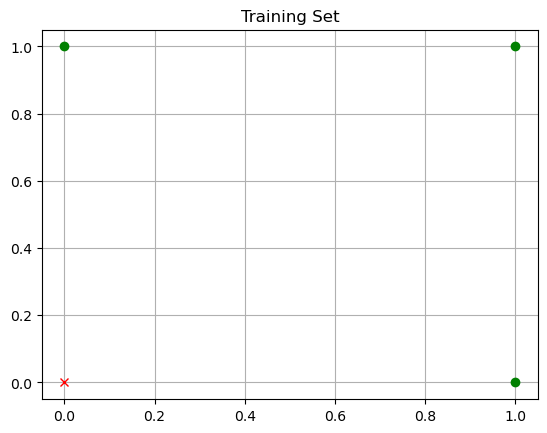

In [108]:
# Plotting training set
orclassifier.plot_training_set()

In [13]:
# Computing sigmoid value of infinite
orclassifier.sigmoid_function(np.inf)

1.0

In [14]:
# Computing hypothesis values of training data
orclassifier.hypothesis_function(X)

array([0.06675806, 0.97346186, 0.97346394, 0.99994684])

In [15]:
# Computing cost/loss value of training data
orclassifier.cost_function()

0.030733771797502342

In [16]:
# Computing gradient values of cost function
orclassifier.gradient()

array([ 0.00340768, -0.0066473 , -0.00664782])

In [136]:
# Computing cost_history, iteration, optimized_theta using gradient_descent method
cost_history, iteration, optimized_theta = orclassifier.gradient_descent()

The convergence has obtained after 15122 steps.
The optimized theta is [0.47 0.85 0.28]
The final cost value is 0.4411


In [17]:
# Predicting probability of training data using optimied theta
orclassifier.predict_probability(X)

array([0.06675806, 0.97346186, 0.97346394, 0.99994684])

In [18]:
# Labeling the predicted probability of training data
orclassifier.predict_label(X)

array([0, 1, 1, 1])

In [11]:
# Computing the accuracy of the model
orclassifier.model_accuracy(X)

100.0

The convergence has obtained after 30757 steps.
The optimized theta is [-2.64  6.24  6.24]
The final cost value is 0.0307


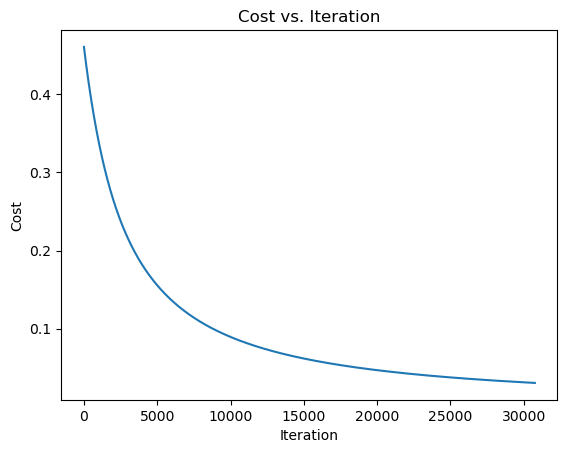

In [43]:
# Plotting cost vs. iteration for debugging
orclassifier.plot_cost_iteration()

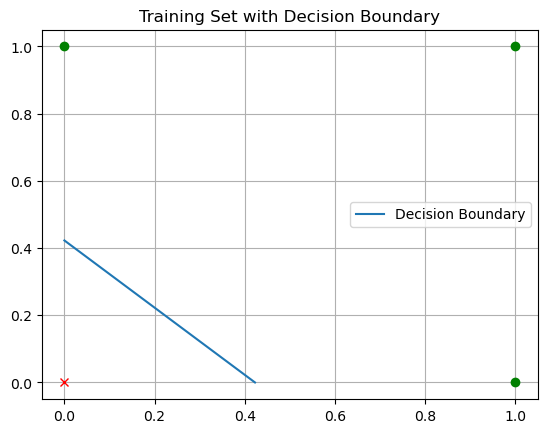

In [10]:
# Plotting decision boundary line in the training set plot
orclassifier.plot_decision_boundary()

In [45]:
# Creating a dataframe to demonstrate the actual and predicted data together
data = pd.DataFrame(X, columns=["x0", "x1", "x2"])
data = data.assign(y_actual_label = y)
data = data.assign(y_prob = orclassifier.predict_probability(X).round(2))
data = data.assign(y_pred_label = orclassifier.predict_label(X))
data

,x0,x1,x2,y_actual_label,y_prob,y_pred_label
0,1.0,0.0,0.0,0,0.07,0
1,1.0,0.0,1.0,1,0.97,1
2,1.0,1.0,0.0,1,0.97,1
3,1.0,1.0,1.0,1,1.00,1


In [12]:
orclassifier.theta

array([-2.63758941,  6.23994554,  6.2398652 ])

In [30]:
orclassifier.gradient_descent?

Signature: orclassifier.gradient_descent()
Docstring:
Gradient descent process to obtain optimized theta values, cost history values and the number of iterations needed for reaching a convergence.
!!! Be aware not to use this method and plot_cost_iteration method at the same time as it will cause incorrect results. !!!
File:      c:\users\user\appdata\local\temp\ipykernel_10408\1030629589.py
Type:      method